The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


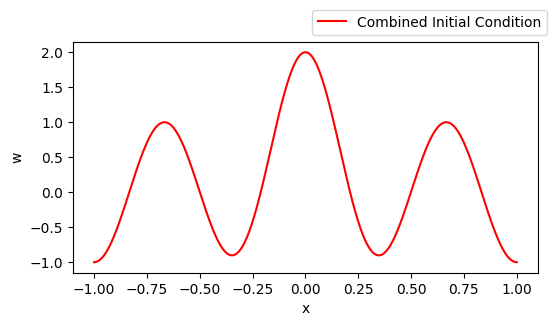

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial condition function
def initial_condition(x):
    return np.cos(3 * np.pi * x) + np.exp(-20 * x**2)

# Generate x values from -1 to 1
x = np.linspace(-1, 1, 1000)  # 1000 points for smooth curve

# Evaluate the initial condition at each point in x
y = initial_condition(x)

# Plot the initial condition
plt.figure(figsize=(6, 3))
plt.plot(x, y, label="Combined Initial Condition",c='red')
#plt.title("Initial Condition")
plt.xlabel("x")
plt.ylabel("w")
#plt.axhline(0, color='black',linewidth=0.5, linestyle='--', alpha=0.7)
#plt.axvline(0, color='black',linewidth=0.5, linestyle='--', alpha=0.7)
plt.grid(False)
plt.legend(bbox_to_anchor=(0.5, 1))

plt.savefig('IC_comb.eps', dpi=300)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import numpy as np

# Load the array from the .npy file
path="/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthEvoPINN/Combined_Initial_New/Train"
test_points = np.load(path+'/test_array.npy')
# Load the array from the .npy file
train_points = np.load(path+'/train_array.npy')
#ftrain_points = np.load('/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/nd25001/Final_train_array.npy')
X_points = np.load(path+'/X_array.npy')

bci= np.load(path+'/bc_initial_array.npy')


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


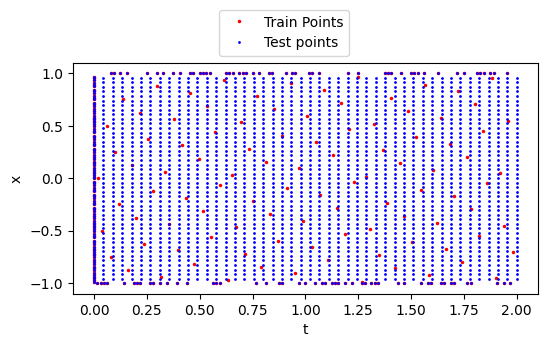

In [4]:
# Extracting the testing data points from the 'data' object
fig = plt.figure(figsize=(6, 3))
x_test = test_points[:, 0]
t_test = test_points[:, 1]
x_train = train_points[:, 0]
t_train = train_points[:, 1]

# Plotting the testing data points using red crosses ('xr')
plt.plot(t_train,x_train, '.', c='red',clip_on=False,markersize=3,label='Train Points')
plt.plot(t_test,x_test, '.', c='blue',clip_on=False,markersize=2,label='Test points')



# Setting the labels and title for the plot
plt.xlabel('t')
plt.ylabel('x')
plt.legend(bbox_to_anchor=(0.3, 1))
#plt.title('Testing data points', fontsize=10)

# Saving the plot as 'test_data.eps' with dpi (dots per inch) set to 100
plt.savefig('Train_test_data_exp_comb.eps', dpi=300)

In [12]:


x_bc.shape

(250000,)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


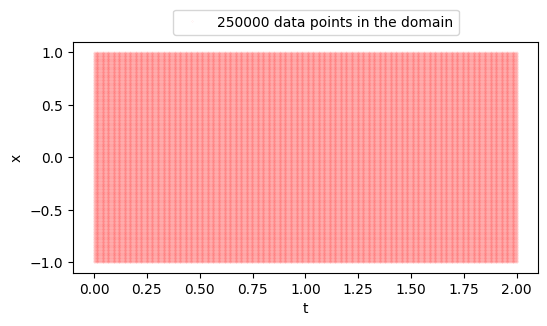

In [5]:

t=np.linspace(0,2,500).reshape(-1,1)
x=np.linspace(-1,1,500).reshape(-1,1)
xx, tt = np.meshgrid(x, t)
X = np.vstack((np.ravel(xx), np.ravel(tt))).T
# Extracting the testing data points from the 'data' object
fig = plt.figure(figsize=(6, 3))
x_bc = X[:, 0]
t_bc = X[:, 1]

# Plotting the testing data points using red crosses ('xr')
plt.plot(t_bc,x_bc, '.', c='red',clip_on=False,markersize=0.05,label='250000 data points in the domain')

# Setting the labels and title for the plot
plt.xlabel('t')
plt.ylabel('x')
plt.legend(bbox_to_anchor=(0.2, 1))
#plt.grid(True)
#plt.title('Testing data points', fontsize=10)

# Saving the plot as 'test_data.eps' with dpi (dots per inch) set to 100
plt.savefig('Data_for_model_eval.eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


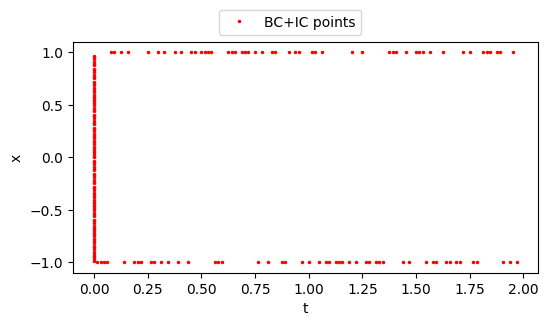

In [3]:
# Extracting the testing data points from the 'data' object
fig = plt.figure(figsize=(6, 3))
x_bc = bci[:, 0]
t_bc = bci[:, 1]

# Plotting the testing data points using red crosses ('xr')
plt.plot(t_bc,x_bc, '.', c='red',clip_on=False,markersize=3,label='BC+IC points')

# Setting the labels and title for the plot
plt.xlabel('t')
plt.ylabel('x')
plt.legend(bbox_to_anchor=(0.3, 1))
#plt.title('Testing data points', fontsize=10)

# Saving the plot as 'test_data.eps' with dpi (dots per inch) set to 100
plt.savefig('BC_IC.eps', dpi=300)

In [5]:
%matplotlib inline


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


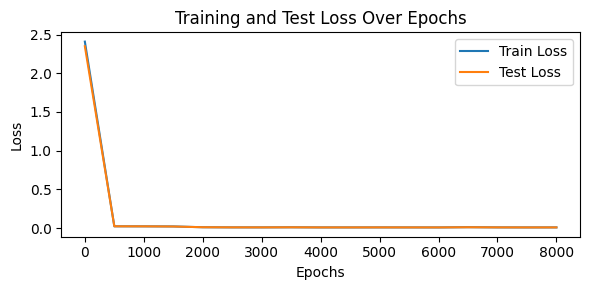

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the loss.dat file
ldata = np.loadtxt("/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthEvoPINN/Combined_Initial_New//Train/loss.dat", skiprows=1)

# Extract columns for step, loss_train, loss_test components
steps = ldata[0:, 0]
loss_train_components = ldata[0:, 1:4]
loss_test_components = ldata[0:, 4:7]

# Calculate the combined loss as the sum of components
loss_train = np.sum(loss_train_components, axis=1)
loss_test = np.sum(loss_test_components, axis=1)
# Plot the combined tra4ning and test loss
plt.figure(figsize=(6, 3))
plt.plot(steps, loss_train, label='Train Loss')
plt.plot(steps, loss_test, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.tight_layout()
#plt.autoscale(tight=False)
#plt.grid()
plt.savefig('Loss_comb.eps',dpi=300)
plt.show()

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.use('pgf')
import tensorflow as tf
import numpy as np
import scipy.io
from scipy.interpolate import griddata
import time
from itertools import product, combinations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
#from plotting import newfig, savefig
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec

2024-05-05 10:27:39.864779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-05 10:27:40.018935: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-05 10:27:44.278292: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/trl102/miniconda3/envs/tf/lib/
2024-05-05 10:27:44.278451: W tensorflow/compiler

In [8]:
U_pred = np.load("/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthEvoPINN/Combined_Initial_New/Train/U_pred.npy")
f= np.load("/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthEvoPINN/Combined_Initial_New/Train/f.npy")


In [10]:
pwd

'/home/trl102/Dir/MyDailyWork/PDE/DeepXde_PDE/FifthEvoPINN/Combined_Initial_New'

In [9]:
t=np.linspace(0,2,500).reshape(-1,1)
x=np.linspace(-1,1,500).reshape(-1,1)
xx, tt = np.meshgrid(x, t)
X = np.vstack((np.ravel(xx), np.ravel(tt))).T

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


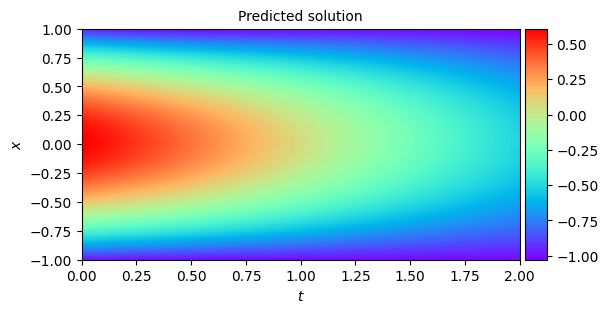

In [10]:
import matplotlib.gridspec as gridspe
from matplotlib.gridspec import GridSpec
%matplotlib inline
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(6, 3))

h = ax.imshow(U_pred.T, interpolation='nearest', cmap='rainbow',
                  extent=[t.min(), t.max(), x.min(), x.max()],
                  origin='lower', aspect='auto')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)
line = np.linspace(x.min(), x.max(), 2)[:,None]

ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.legend(frameon=False, loc = 'best')
ax.set_title('Predicted solution', fontsize = 10)

plt.savefig('W_2d_comb.eps',dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


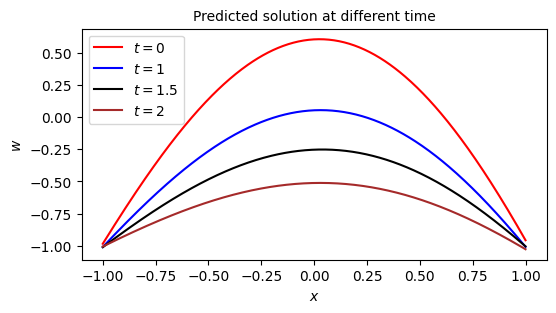

In [11]:
import matplotlib.pyplot as plt

# Assuming you have x and U_pred defined somewhere

# Set up a single plot
fig, ax = plt.subplots(figsize=(6, 3))

# Plotting invisible lines with labels for legend
ax.plot([], [], 'r-', label='$t = 0$')
ax.plot([], [], 'b-', label='$t = 1$')
ax.plot([], [], 'k-', label='$t = 1.5$')
ax.plot([], [], 'brown', label='$t = 2$')

# Plotting the function slices at different time points
ax.plot(x, U_pred[0, :], 'r-')
ax.plot(x, U_pred[250, :], 'b-')
ax.plot(x, U_pred[375, :], 'k-')
ax.plot(x, U_pred[499, :], 'brown')

ax.set_xlabel('$x$')
ax.set_ylabel('$w$')
#ax.set_title('Function slices at different time points')
ax.legend()

# Save the entire figure
ax.set_title('Predicted solution at different time', fontsize=10)

plt.savefig('w_slice_comb.eps', dpi=300, bbox_inches='tight')

# Display the plot if needed
plt.show()

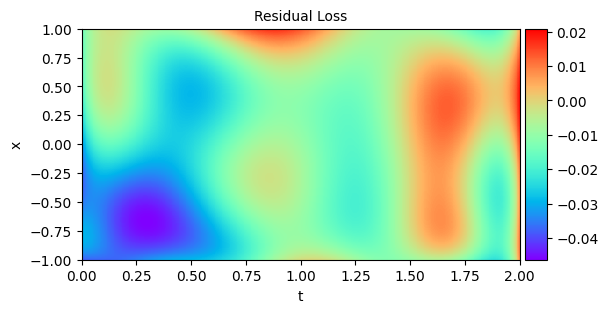

In [12]:
# Pde Residual loss

fig, ax = plt.subplots(figsize=(6, 3))

# Plot the 2D image of the residual using imshow
h = ax.imshow(f.reshape(500, 500), interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto')

# Add a colorbar for the image
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)

# Set the labels, title, and legend for the plot
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Residual Loss', fontsize=10)

# Save the plot as 'u_residual.eps' with dpi (dots per inch) set to 100
plt.savefig('Residual_comb.eps', dpi=300)

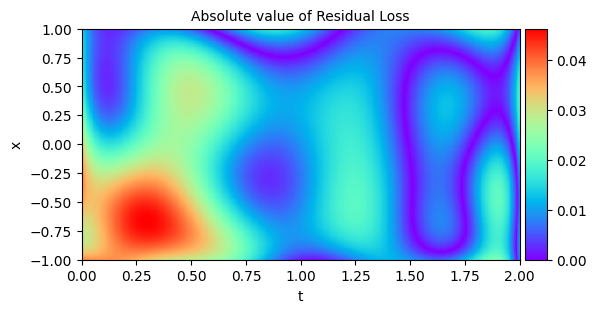

In [13]:
# Pde Residual loss

fig, ax = plt.subplots(figsize=(6, 3))

# Plot the 2D image of the residual using imshow
h = ax.imshow(np.abs(f.reshape(500, 500)), interpolation='nearest', cmap='rainbow',
              extent=[t.min(), t.max(), x.min(), x.max()],
              origin='lower', aspect='auto')

# Add a colorbar for the image
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(h, cax=cax)

# Set the labels, title, and legend for the plot
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('Absolute value of Residual Loss', fontsize=10)

# Save the plot as 'u_residual.eps' with dpi (dots per inch) set to 100
plt.savefig('Abs_Residual_comb.eps', dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


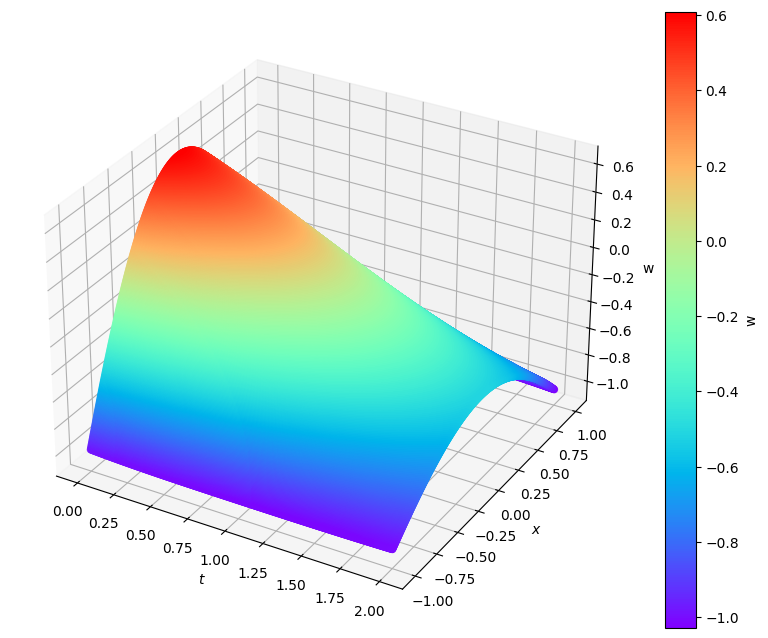

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming x, t, and U_pred are defined
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

t=np.linspace(0,2,500).reshape(-1,1)
x=np.linspace(-1,1,500).reshape(-1,1)

# Reshape t and x into 2D arrays using meshgrid
t, x = np.meshgrid(t, x)

# Create a 3D scatter plot
scatter = ax.scatter(t, x, U_pred.T, c=U_pred.T, cmap='rainbow', marker='o')

# Add a colorbar
colorbar = fig.colorbar(scatter, ax=ax, label='w')

# Set labels for the axes
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('w')

# Set a title for the plot
ax.set_title('')
plt.savefig('w_3d_comb.eps',dpi=20)

#plt.show()

